In [1]:
import pandas as pd
import numpy as np
import math
pd.options.display.max_columns = 99
pd.options.display.max_rows = 1000

In [2]:
market = pd.read_csv('./data/Market.csv')

In [3]:
market.head()

,IsinIdx,DateKey,Price,Yield,ZSpread
0,1,20160101,104.250,7.835,5.505
1,7,20160101,107.500,7.520,5.541
2,102,20160101,100.746,4.048,2.085
3,331,20160101,112.790,-0.752,-0.215
4,345,20160101,113.383,-0.667,-0.272


In [17]:
price = market[['IsinIdx','DateKey','Price']]
yieldd = market[['IsinIdx','DateKey','Yield']]

### Transformation

In [18]:
price.sort_values(by=['IsinIdx', 'DateKey'], inplace=True)

/Users/jinweitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
price['lag'] = price.groupby(by='IsinIdx')['Price'].shift(1)

/Users/jinweitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
price.head()

,IsinIdx,DateKey,Price,lag
0,1,20160101,104.25,NaN
1842,1,20160104,103.50,104.25
11771,1,20160105,104.50,103.50
21718,1,20160106,104.00,104.50
31680,1,20160107,104.00,104.00


In [23]:
price['diff'] = price['Price'] - price['lag']

In [24]:
price = price.pivot(index='IsinIdx', columns='DateKey', values='Price')

In [25]:
price.head()

DateKey,20160101,20160104,20160105,20160106,20160107,20160108,20160111,20160112,20160113,20160114,20160115,20160118,20160119,20160120,20160121,20160122,20160125,20160126,20160127,20160128,20160129,20160201,20160202,20160203,20160204,20160205,20160208,20160209,20160210,20160211,20160212,20160215,20160216,20160217,20160218,20160219,20160222,20160223,20160224,20160225,20160226,20160229,20160301,20160302,20160303,20160304,20160307,20160308,20160309,...,20180213,20180214,20180215,20180216,20180219,20180220,20180221,20180222,20180223,20180226,20180227,20180228,20180301,20180302,20180305,20180306,20180307,20180308,20180309,20180312,20180313,20180314,20180315,20180316,20180319,20180320,20180321,20180322,20180323,20180326,20180327,20180328,20180329,20180330,20180402,20180403,20180404,20180405,20180406,20180409,20180410,20180411,20180412,20180413,20180416,20180417,20180418,20180419,20180420
IsinIdx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,104.25,103.50,104.50,104.0,104.00,103.5,103.0,102.5,102.5,101.75,101.25,103.500,102.00,101.25,101.500,102.00,102.375,103.00,103.750,103.75,104.000,104.25,104.85,105.250,106.425,107.20,102.00,102.00,106.50,105.55,105.550,105.550,106.250,106.750,106.750,106.500,106.250,105.500,104.000,106.000,104.000,103.750,103.750,103.000,102.500,103.500,103.500,104.000,102.750,...,108.917,107.25,108.00,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.25,109.5,109.5,109.50,108.50,108.50,108.50,108.50,108.50,108.50,108.50,108.75,108.75,108.750,108.750,108.750,108.75,108.75,108.75,108.75,108.75,108.75,108.75,110.0,110.00,110.0,109.0,109.0,109.25,109.25
7,107.50,106.75,107.25,107.0,106.75,106.5,106.5,106.5,106.0,105.25,104.50,104.500,104.25,104.25,104.750,106.00,106.400,106.25,106.875,107.30,107.375,107.75,107.55,107.625,107.750,107.75,107.75,107.75,107.60,107.30,107.750,107.750,107.750,108.500,108.500,108.250,108.500,107.250,107.750,107.750,108.250,108.250,107.750,107.500,107.250,108.250,108.500,108.000,107.875,...,113.792,113.75,114.75,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.25,115.25,115.25,115.25,115.50,116.00,116.0,116.0,115.75,115.50,115.50,115.75,115.75,115.75,115.75,115.75,115.75,115.75,115.812,115.875,115.938,116.00,116.00,116.00,116.00,116.00,116.00,116.00,116.0,115.75,115.5,115.5,115.5,115.25,115.25
13,NaN,80.00,80.00,80.0,80.00,80.0,80.0,80.0,80.0,80.00,80.00,80.000,80.00,89.00,89.000,89.00,89.000,89.00,89.000,89.00,89.000,89.00,89.00,89.000,89.000,89.00,89.00,89.00,89.00,89.00,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,89.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,102.75,104.25,104.0,104.00,103.5,103.5,103.5,103.5,103.50,103.00,102.625,102.25,102.00,102.625,103.25,103.500,104.00,104.425,104.75,104.750,105.20,105.25,105.250,105.250,105.25,105.25,105.25,105.25,105.25,105.250,105.250,105.500,106.250,106.250,106.250,107.000,105.500,105.500,107.000,107.000,107.500,107.500,107.500,107.500,107.500,107.500,107.500,107.500,...,110.792,110.75,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.00,111.0,111.0,111.75,111.75,111.75,111.75,111.75,111.75,111.75,112.00,112.00,112.00,112.000,112.000,112.000,112.00,112.00,108.50,108.50,108.50,108.50,108.50,108.5,108.50,108.5,108.5,108.5,108.50,108.50
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.50,98.500,98.50,98.500,98.50,100.100,100.20,100.200,100.20,100.20,100.200,100.200,100.20,100.20,100.20,100.20,100.20,100.200,100.200,100.500,100.500,100.500,100.500,100.500,100.500,100.500,100.500,100.500,100.500,100.500,101.250,101.250,101.250,101.250,101.250,101.250,...,NaN,NaN,NaN,NaN,NaN,N

### Get standard deviation of bond based on this formula: http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:standard_deviation_volatility

In [45]:
price2 = market[['IsinIdx','DateKey','Price']]
price2.sort_values(by=['IsinIdx', 'DateKey'], inplace=True)


/Users/jinweitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
price2['rollingMean'] = price2.groupby(by='IsinIdx')['Price'].rolling(window=10, min_periods=10).mean().reset_index(0,drop=True)

/Users/jinweitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
price_noNa = price2[np.isfinite(price2['rollingMean'])]

In [59]:
price_noNa['deviation'] = price_noNa['Price'] - price_noNa['rollingMean']

/Users/jinweitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
price_noNa['deviationSquared'] = price_noNa['deviation'].apply(lambda x: x**2)

/Users/jinweitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
price_noNa.head()

,IsinIdx,DateKey,Price,rollingMean,deviation,deviationSquared
81648,1,20160114,101.75,103.350,-1.600,2.560000
91681,1,20160115,101.25,103.050,-1.800,3.240000
101714,1,20160118,103.50,103.050,0.450,0.202500
111751,1,20160119,102.00,102.800,-0.800,0.640000
121790,1,20160120,101.25,102.525,-1.275,1.625625


### Another method: Monthly volatility: https://en.wikipedia.org/wiki/Volatility_(finance)#Mathematical_definition

In [4]:
price3 = market[['IsinIdx','DateKey','Price']]

In [5]:
price3.sort_values(by=['IsinIdx', 'DateKey'], inplace=True)

/Users/jinweitan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
price3.head()

,IsinIdx,DateKey,Price
0,1,20160101,104.25
1842,1,20160104,103.50
11771,1,20160105,104.50
21718,1,20160106,104.00
31680,1,20160107,104.00


In [7]:
price3['MonthYear'] = price3['DateKey'].apply(lambda x: str(x)[2:6])

/Users/jinweitan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
priceVolatility = price3.groupby(by=['IsinIdx','MonthYear'])['Price'].mean().reset_index()

In [9]:
priceVolatility['lag'] = priceVolatility.groupby(by='IsinIdx')['Price'].shift(1)

In [10]:
priceVolatility = priceVolatility[np.isfinite(priceVolatility['lag'])]

In [11]:
def calVol(x):
    return math.log(x['Price']/x['lag'])

In [12]:
priceVolatility['volatility'] = priceVolatility.apply(calVol,axis=1)

In [13]:
priceVolatility_grouped = priceVolatility.groupby(by='IsinIdx')['volatility'].mean()

In [14]:
priceVolatility_grouped = priceVolatility_grouped.reset_index()

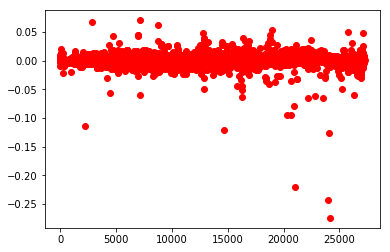

In [15]:
#Overview of bonds volatility
import matplotlib.pyplot as plt
plt.plot(priceVolatility_grouped['IsinIdx'], priceVolatility_grouped['volatility'], 'ro')
plt.show()

In [16]:
priceVolatility_grouped_small = priceVolatility_grouped[['IsinIdx','volatility']]

In [17]:
priceVolatility_grouped_small.head()

,IsinIdx,volatility
0,1,0.002150
1,7,0.003228
2,13,0.009142
3,15,0.001991
4,16,-0.009103


In [18]:
def rankVolatility(val):
    x = val['volatility']
    if x <= 0.3:
        return 'low'
    elif x > 0.5:
        return 'high'
    else:
        return 'med'

In [19]:
priceVolatility_grouped_small['volrank'] = priceVolatility_grouped_small.apply(rankVolatility, axis=1)

In [20]:
priceVolatile_final = priceVolatility_grouped_small[['IsinIdx','volrank']]

In [21]:
priceVolatile_final.to_csv("./data/volatile.csv", index=False)